# NOTEBOOK 3: DISTRIBUTIONS & OUTLIERS
"Debugging AI Data Like a Pro!"

## AI Engineering Use Cases:  
1. **Histograms**: Spot skewed data (e.g., unbalanced classes)  
2. **Boxplots**: Find outliers corrupting your model  
3. **Real Fixes**: Normalize data, handle outliers  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate neural network training loss
np.random.seed(42)
loss = np.concatenate([
    np.random.normal(0.2, 0.05, 500),  # Good runs
    np.random.normal(1.5, 0.3, 50)     # Outliers (failed runs)
])

## About the Data:  
- `loss`: Training loss values from a neural net  
- Most values ~0.2 (good), but some outliers ~1.5 (failed)  

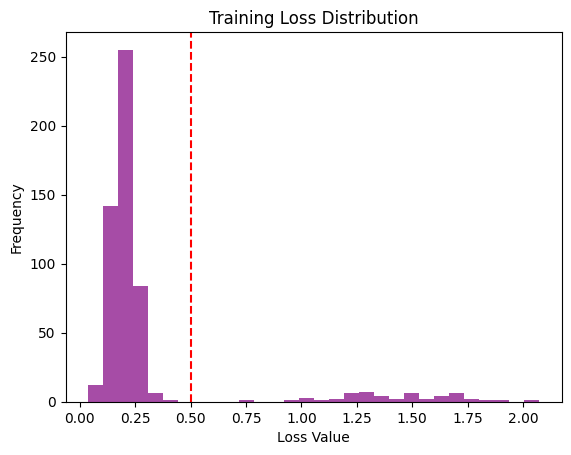

In [2]:
plt.hist(loss, bins=30, color="purple", alpha=0.7)
plt.title("Training Loss Distribution")
plt.xlabel("Loss Value")
plt.ylabel("Frequency")
plt.axvline(x=0.5, color="red", linestyle="--")  # Threshold
plt.show()

## AI Insights:  
- **Problem**: The long tail (right side) shows failed training runs  
- **Fix**: Investigate learning rate or data quality for those batches  

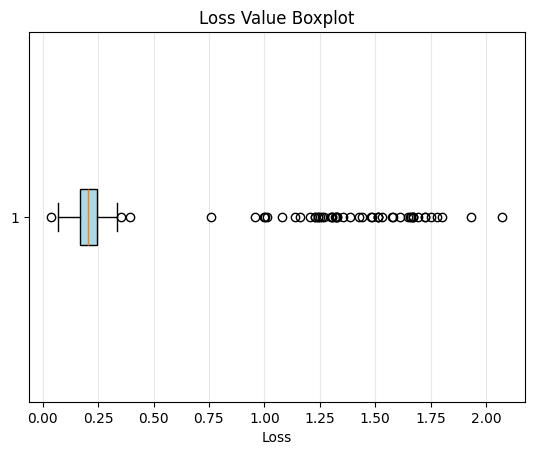

In [3]:
plt.boxplot(loss, vert=False, patch_artist=True,
            boxprops=dict(facecolor="lightblue"))
plt.title("Loss Value Boxplot")
plt.xlabel("Loss")
plt.grid(axis="x", alpha=0.3)
plt.show()

## Reading the Boxplot:  
- **Whiskers**: Normal range (most data)  
- **Box**: 25th-75th percentile  
- **Red Line**: Median  
- **Dots**: Outliers corrupting your model  

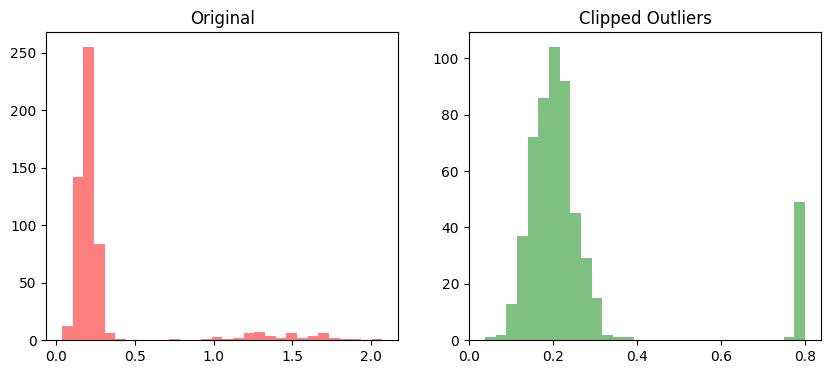

In [4]:
# Clip outliers (common preprocessing step)
loss_clipped = np.clip(loss, a_min=None, a_max=0.8)

# Plot comparison
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(loss, bins=30, color="red", alpha=0.5)
plt.title("Original")

plt.subplot(1,2,2)
plt.hist(loss_clipped, bins=30, color="green", alpha=0.5)
plt.title("Clipped Outliers")
plt.show()

## Key AI Techniques:  
- `np.clip()`: Caps extreme values  
- **Why**: Stops outliers from dominating gradients  

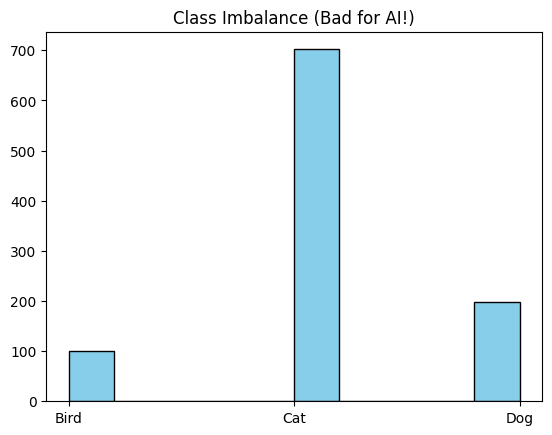

In [5]:
# Simulate class imbalance (common in AI datasets)
classes = np.random.choice(["Cat", "Dog", "Bird"],
                          size=1000,
                          p=[0.7, 0.2, 0.1])  # 70% cats!

# Plot
plt.hist(classes, color="skyblue", edgecolor="black")
plt.title("Class Imbalance (Bad for AI!)")
plt.show()

## AI Danger Zone:  
- Models get **lazy** if one class dominates (always predicts "Cat")  
- **Fix**: Oversample minority classes or use `class_weight`  

## Exercise: Debug This AI Data  
**Data**:  

accuracy = [0.8, 0.82, 0.79, 0.81, 0.92, 0.78, 0.93, 0.77, 0.95]

**Tasks:**

Plot a **histogram** (bins=5)

Plot a **boxplot**

**Clip outliers** above 0.85 and replot

(Solution below!)

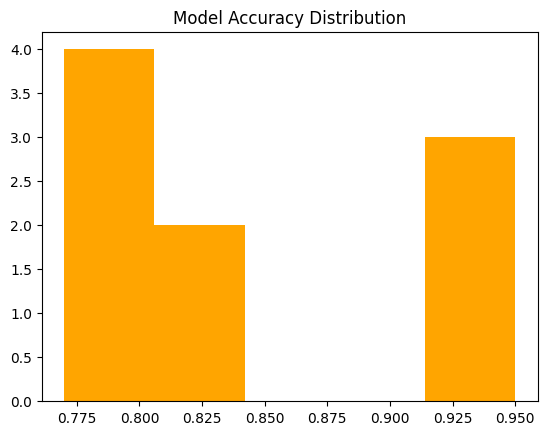

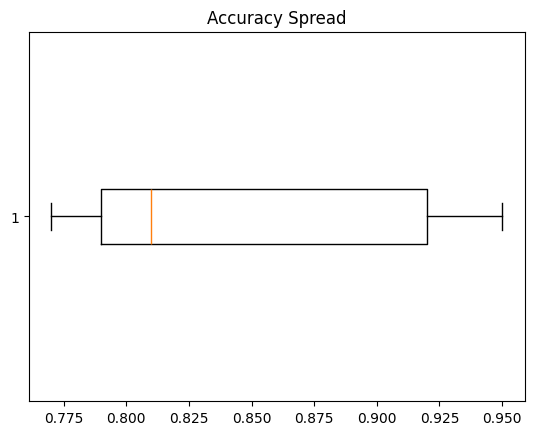

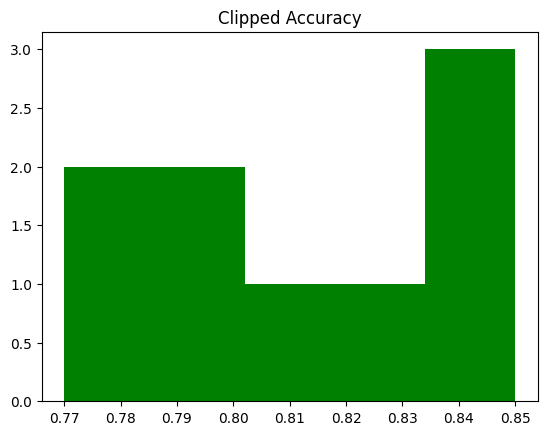

In [6]:
# 1. Histogram
accuracy = [0.8, 0.82, 0.79, 0.81, 0.92, 0.78, 0.93, 0.77, 0.95]
plt.hist(accuracy, bins=5, color="orange")
plt.title("Model Accuracy Distribution")
plt.show()

# 2. Boxplot
plt.boxplot(accuracy, vert=False)
plt.title("Accuracy Spread")
plt.show()

# 3. Clipped
clipped = np.clip(accuracy, a_min=None, a_max=0.85)
plt.hist(clipped, bins=5, color="green")
plt.title("Clipped Accuracy")
plt.show()